In [44]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
from matplotlib import pyplot

In [ ]:
DATA_PATH = '../../data/interindustry_analysis/'

# 경기 지역별 업종별 부가가치유발계수 도출

### 지역화폐의 경제적 파급효과로서 부가가치유발계수 계산

In [60]:
gg = pd.read_csv \
(DATA_PATH + '업종비율지수_경기지역전체.csv')
vaic = pd.read_excel(DATA_PATH + '부가가치유발계수_표준_업종.xlsx', \
                        sheet_name='산업연관표_표준행렬_부가가치유발계수')

In [61]:
gg = gg.set_index('업종')
vaic = vaic.set_index('Unnamed: 0')

In [62]:
vaic

,가구,광학제품,의료기관,레저업소,레저용품,문화취미,보건위생,사무통신,서적문구,수리서비스,...,연료판매,유통업,음료식품,의류,요식업,자동차정비,자동차판매,전기가전,주방용구,직물
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
가구,0.762328,0.001341,0.001135,0.002238,0.002490,0.004172,0.002348,0.003123,0.001264,0.002145,...,0.001158,0.000585,0.003602,0.001665,0.005309,0.000286,0.001077,0.001169,2.230073e-04,0.002184
광학제품,0.017039,2.458012,0.010176,0.012660,0.083684,0.022695,0.016635,0.051561,0.028125,0.009516,...,0.012811,0.004947,0.338820,0.026378,0.021872,0.003753,0.012034,0.018959,3.937591e-03,0.018613
의료기관,0.007339,0.633221,2.164149,0.005618,0.009461,0.009986,0.006052,0.014554,0.008044,0.004967,...,0.007130,0.003019,0.053788,0.009234,0.011456,0.001863,0.003808,0.007140,1.560868e-03,0.013414
레저업소,0.003981,0.005410,0.002896,1.088370,0.004153,0.003268,0.003148,0.009065,0.005412,0.002722,...,0.004393,0.001155,0.016264,0.004569,0.003453,0.001403,0.001775,0.003864,8.346930e-04,0.008746
레저용품,0.001154,0.001548,0.002477,0.023370,1.440624,0.024143,0.001127,0.004194,0.004272,0.000898,...,0.001323,0.000987,0.005813,0.001898,0.003151,0.000365,0.000748,0.001675,5.015672e-04,0.001816
문화취미,0.002258,0.025756,0.002691,0.005499,0.054555,1.769155,0.002201,0.006264,0.022495,0.001720,...,0.002601,0.001018,0.014785,0.002863,0.003065,0.000718,0.001169,0.002450,6.113515e-04,0.004202
보건위생,0.002342,0.002632,0.014779,0.006942,0.007892,0.011332,2.296601,0.005148,0.002668,0.002681,...,0.001838,0.001294,0.008822,0.002953,0.003411,0.000521,0.000980,0.001868,4.379952e-04,0.003705
사무통신,0.021614,0.061637,0.021494,0.013908,0.029264,0.022179,0.021429,4.309701,0.030467,0.033411,...,0.031822,0.017643,0.104526,0.030267,0.030195,0.005256,0.011557,0.022383,5.704802e-03,0.041584
서적문구,0.010408,0.014589,0.023135,0.011733,0.019558,0.030740,0.015860,0.036863,1.874444,0.005853,...,0.014156,0.005459,0.051009,0.016632,0.012535,0.002420,0.005176,0.012515,3.787379e-03,0.021806


In [56]:
aa=np.array([[1,2,3],[4,5,6]])
bb=np.array([[7,8],[9,10],[11,12]])
np.dot(aa,bb)

array([[ 58,  64],
       [139, 154]])

In [63]:
gg

,가평,고양,과천,광명,광주,구리,군포,남양주,동두천,부천,...,양평,여주,연천,오산,용인,의정부,이천,파주,하남,화성
업종,,,,,,,,,,,,,,,,,,,,,
가구,0.0343,0.5956,0.0974,0.3067,0.7892,0.2657,0.0933,0.9418,0.1850,0.2164,...,0.0665,0.1555,0.0486,0.3202,0.4314,0.2042,0.2272,0.9941,0.2301,0.3861
광학제품,0.0459,0.9692,0.3207,0.6264,0.2994,0.4908,0.3424,0.4129,0.4015,0.6324,...,0.1388,0.1665,0.1685,0.2650,0.4543,0.6274,0.3194,0.5483,0.3886,0.7666
의료기관,0.0553,0.6180,0.4066,0.6841,0.3387,0.7020,1.0000,0.6257,0.4070,0.8404,...,0.2776,0.2665,0.2374,0.6354,1.0000,0.6437,0.4862,0.5675,0.9121,0.8830
레저업소,0.0989,0.9292,0.4834,0.5937,0.4134,0.5528,0.6067,0.7698,0.3811,0.8641,...,0.1568,0.2291,0.2645,0.5712,0.6942,0.7118,0.4093,0.7552,0.6822,1.0000
레저용품,0.1098,0.8618,0.2658,0.5159,0.5551,0.8106,0.6035,0.9792,0.5661,0.8445,...,0.4800,0.6477,0.9379,0.8860,0.7834,0.6106,0.5273,0.6214,0.9259,0.7817
문화취미,0.0887,0.8538,1.0000,0.8881,0.3891,0.4512,0.4317,1.0000,0.4080,0.8142,...,0.4235,0.5494,0.4428,0.5379,0.5606,0.5764,0.6879,0.6978,0.5661,0.6106
보건위생,0.0454,0.8504,0.3706,0.7608,0.3101,0.6569,0.6035,0.6660,0.5948,0.8927,...,0.1635,0.2698,0.2645,0.4840,0.5861,0.6964,0.3501,0.6202,0.4925,0.8275
사무통신,0.0595,0.8354,0.6586,0.5165,0.2809,0.5364,0.7327,0.4703,0.4163,0.9390,...,0.3186,0.1977,0.2411,0.4486,0.4469,0.7574,0.4077,0.3860,0.3388,0.3410
서적문구,0.0493,1.0000,0.7194,0.5445,0.2887,0.4507,0.9003,0.5312,0.3765,0.6094,...,0.2553,0.2606,0.2306,0.5535,0.5577,0.5112,0.2345,1.0000,0.4473,0.9133


In [64]:
vaic_gg=DataFrame(np.dot(vaic,gg))

In [65]:
vaic_gg

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.032480,0.477720,0.091264,0.260559,0.619237,0.225778,0.093738,0.745878,0.163429,0.198329,...,0.065675,0.132464,0.053304,0.268231,0.352304,0.181875,0.191680,0.785544,0.198596,0.322888
1,0.216908,2.726854,1.051452,2.026559,1.096465,1.695060,1.254759,1.569338,1.411860,2.191693,...,0.574549,0.660597,0.727054,1.133974,1.540128,2.013891,1.119760,1.861399,1.370019,2.433074
2,0.174595,2.038818,1.152313,1.996657,1.013335,1.941265,2.480842,1.747340,1.240742,2.371151,...,0.751475,0.743508,0.690249,1.658250,2.553828,1.906670,1.336565,1.707119,2.323465,2.526504
3,0.118264,1.057808,0.559319,0.701919,0.492369,0.652947,0.709132,0.896816,0.464204,1.010428,...,0.200674,0.277704,0.318389,0.674506,0.804553,0.829976,0.483375,0.884001,0.792818,1.148859
4,0.167013,1.302839,0.432317,0.800564,0.834630,1.211943,0.915778,1.475128,0.853664,1.284841,...,0.717429,0.962119,1.379393,1.323786,1.178320,0.932489,0.800379,0.954827,1.382663,1.189162
5,0.172711,1.631161,1.827676,1.663261,0.760155,0.898750,0.857273,1.883166,0.803155,1.563176,...,0.802800,1.033987,0.862565,1.053503,1.090597,1.116878,1.283517,1.343799,1.104016,1.202809
6,0.121800,2.008779,0.889540,1.808022,0.751223,1.561223,1.440681,1.593281,1.412276,2.124364,...,0.412017,0.651960,0.645293,1.166396,1.403705,1.656815,0.847235,1.486153,1.189035,1.964038
7,0.330719,3.903380,3.039326,2.592600,1.491809,2.642600,3.466164,2.414415,2.117338,4.491736,...,1.567926,1.037766,1.242096,2.280847,2.254720,3.616479,2.000962,2.076865,1.798961,1.892886
8,0.131253,2.055248,1.482053,1.231825,0.692827,1.036684,1.870366,1.221424,0.883794,1.408982,...,0.591522,0.598910,0.549835,1.233254,1.233417,1.165631,0.589007,2.091343,1.031223,1.932282
9,0.058565,0.817462,0.461543,0.731289,0.491585,0.580316,0.680161,0.877483,0.619393,0.953317,...,0.247843,0.253632,0.405764,0.672503,0.795671,0.738161,0.429351,0.742736,0.579743,1.001678


In [67]:
gg.columns

Index(['가평', '고양', '과천', '광명', '광주', '구리', '군포', '남양주', '동두천', '부천', '수원',
       '안산', '안성', '양주', '양평', '여주', '연천', '오산', '용인', '의정부', '이천', '파주', '하남',
       '화성'],
      dtype='object')

In [68]:
vaic_gg.columns=gg.columns

In [70]:
vaic.index

Index(['가구', '광학제품', '의료기관', '레저업소', '레저용품', '문화취미', '보건위생', '사무통신', '서적문구',
       '수리서비스', '숙박', '신변잡화', '연료판매', '유통업', '음료식품', '의류', '요식업', '자동차정비',
       '자동차판매', '전기가전', '주방용구', '직물'],
      dtype='object', name='Unnamed: 0')

In [71]:
vaic_gg.index=vaic.index

In [72]:
vaic_gg

,가평,고양,과천,광명,광주,구리,군포,남양주,동두천,부천,...,양평,여주,연천,오산,용인,의정부,이천,파주,하남,화성
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
가구,0.032480,0.477720,0.091264,0.260559,0.619237,0.225778,0.093738,0.745878,0.163429,0.198329,...,0.065675,0.132464,0.053304,0.268231,0.352304,0.181875,0.191680,0.785544,0.198596,0.322888
광학제품,0.216908,2.726854,1.051452,2.026559,1.096465,1.695060,1.254759,1.569338,1.411860,2.191693,...,0.574549,0.660597,0.727054,1.133974,1.540128,2.013891,1.119760,1.861399,1.370019,2.433074
의료기관,0.174595,2.038818,1.152313,1.996657,1.013335,1.941265,2.480842,1.747340,1.240742,2.371151,...,0.751475,0.743508,0.690249,1.658250,2.553828,1.906670,1.336565,1.707119,2.323465,2.526504
레저업소,0.118264,1.057808,0.559319,0.701919,0.492369,0.652947,0.709132,0.896816,0.464204,1.010428,...,0.200674,0.277704,0.318389,0.674506,0.804553,0.829976,0.483375,0.884001,0.792818,1.148859
레저용품,0.167013,1.302839,0.432317,0.800564,0.834630,1.211943,0.915778,1.475128,0.853664,1.284841,...,0.717429,0.962119,1.379393,1.323786,1.178320,0.932489,0.800379,0.954827,1.382663,1.189162
문화취미,0.172711,1.631161,1.827676,1.663261,0.760155,0.898750,0.857273,1.883166,0.803155,1.563176,...,0.802800,1.033987,0.862565,1.053503,1.090597,1.116878,1.283517,1.343799,1.104016,1.202809
보건위생,0.121800,2.008779,0.889540,1.808022,0.751223,1.561223,1.440681,1.593281,1.412276,2.124364,...,0.412017,0.651960,0.645293,1.166396,1.403705,1.656815,0.847235,1.486153,1.189035,1.964038
사무통신,0.330719,3.903380,3.039326,2.592600,1.491809,2.642600,3.466164,2.414415,2.117338,4.491736,...,1.567926,1.037766,1.242096,2.280847,2.254720,3.616479,2.000962,2.076865,1.798961,1.892886
서적문구,0.131253,2.055248,1.482053,1.231825,0.692827,1.036684,1.870366,1.221424,0.883794,1.408982,...,0.591522,0.598910,0.549835,1.233254,1.233417,1.165631,0.589007,2.091343,1.031223,1.932282


Text(0.5, 1.0, '경기 지역별 업종별 부가가치유발계수')

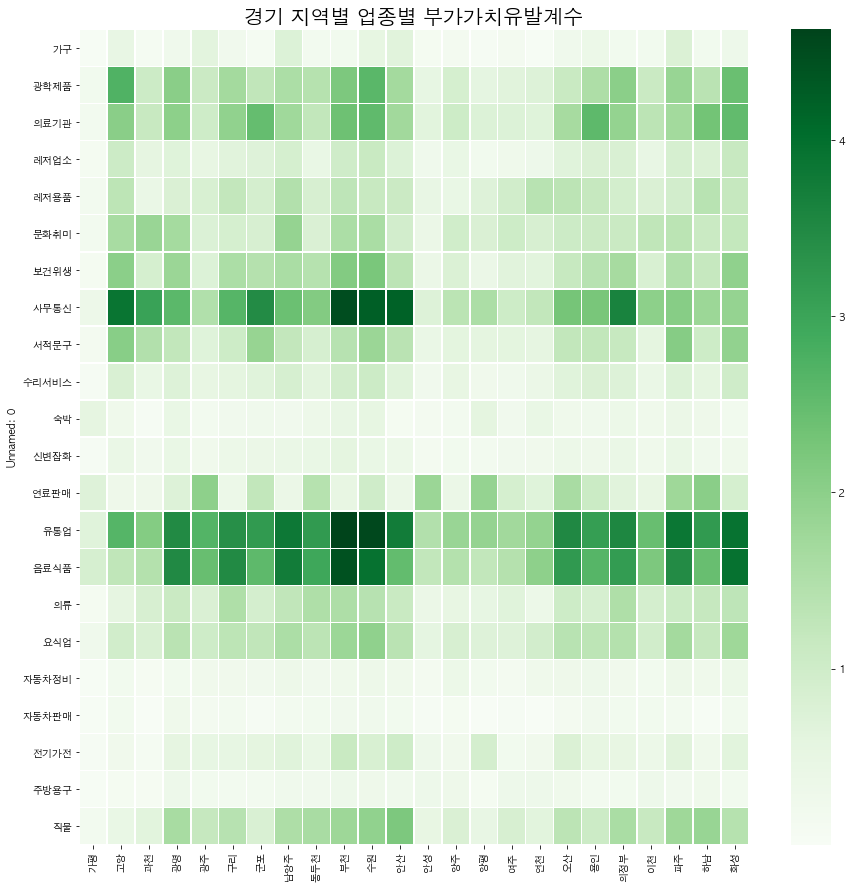

In [73]:
import seaborn as sns


plt.figure(figsize=(15,15))
sns.heatmap(data=vaic_gg, annot=False, fmt='.2f', \
            linewidths=.5, cmap='Greens')
plt.title('경기 지역별 업종별 부가가치유발계수', fontsize=20)

In [74]:
#vaic_gg.to_csv \
#(DATA_PATH + '경기_지역별_업종별_부가가치유발계수.csv')

# 경기 지역별 업종별 부가가치유발계수 표준화

### 최댓값을 1.0000으로 하는 부가가치유발계수 표준화

In [134]:
local_vaic_max = DataFrame(vaic_gg.max(axis = 0))
#local_vaic_max.columns = ['지역별 부가가치유발계수 최댓값']
local_vaic_max

local_vaic_max_array = local_vaic_max.values
local_vaic_max_array

array([[0.87508545],
       [3.9033803 ],
       [3.03932558],
       [3.49600158],
       [2.69102696],
       [3.48158907],
       [3.46616398],
       [3.83215916],
       [3.18182372],
       [4.62805713],
       [4.57201047],
       [4.20468294],
       [1.81223933],
       [1.84193397],
       [1.89600102],
       [1.73497181],
       [1.97874949],
       [3.52213677],
       [3.1222576 ],
       [3.61647947],
       [2.44842716],
       [3.85098176],
       [3.18324657],
       [3.94719442]])

In [129]:
aa
aa
aa=DataFrame(aa)
cc=np.array([[10],[100]])
cc=DataFrame(cc)
aa/cc

,0,1,2
0,0.10,NaN,NaN
1,0.04,NaN,NaN


In [91]:
vaic_gg.transpose()

Unnamed: 0,가구,광학제품,의료기관,레저업소,레저용품,문화취미,보건위생,사무통신,서적문구,수리서비스,...,연료판매,유통업,음료식품,의류,요식업,자동차정비,자동차판매,전기가전,주방용구,직물
가평,0.032480,0.216908,0.174595,0.118264,0.167013,0.172711,0.121800,0.330719,0.131253,0.058565,...,0.720835,0.668973,0.875085,0.111449,0.269468,0.036643,0.025346,0.066048,0.021533,0.179466
고양,0.477720,2.726854,2.038818,1.057808,1.302839,1.631161,2.008779,3.903380,2.055248,0.817462,...,0.305903,2.662861,1.277446,0.559334,0.959873,0.197152,0.209417,0.250020,0.116125,0.451584
과천,0.091264,1.051452,1.152313,0.559319,0.432317,1.827676,0.889540,3.039326,1.482053,0.461543,...,0.294332,2.097506,1.455413,0.853172,0.819936,0.088218,0.000054,0.108515,0.084230,0.647418
광명,0.260559,2.026559,1.996657,0.701919,0.800564,1.663261,1.808022,2.592600,1.231825,0.731289,...,0.727094,3.476123,3.496002,1.111906,1.369339,0.214295,0.276213,0.545390,0.323293,1.636268
광주,0.619237,1.096465,1.013335,0.492369,0.834630,0.760155,0.751223,1.491809,0.692827,0.491585,...,1.972279,2.691027,2.441335,0.799327,1.020293,0.236618,0.143010,0.506354,0.198731,1.180178
구리,0.225778,1.695060,1.941265,0.652947,1.211943,0.898750,1.561223,2.642600,1.036684,0.580316,...,0.368282,3.392214,3.481589,1.526483,1.319279,0.237907,0.174053,0.512943,0.178240,1.400659
군포,0.093738,1.254759,2.480842,0.709132,0.915778,0.857273,1.440681,3.466164,1.870366,0.680161,...,1.238118,3.188358,2.551753,0.915107,1.256707,0.224904,0.055223,0.590754,0.175191,0.818704
남양주,0.745878,1.569338,1.747340,0.896816,1.475128,1.883166,1.593281,2.414415,1.221424,0.877483,...,0.407971,3.832159,3.745749,1.260442,1.569719,0.336822,0.179050,0.672552,0.259383,1.550049
동두천,0.163429,1.411860,1.240742,0.464204,0.853664,0.803155,1.412276,2.117338,0.883794,0.619393,...,1.417520,3.181824,2.955164,1.524227,1.320761,0.233399,0.189874,0.445416,0.229125,1.612507
부천,0.198329,2.191693,2.371151,1.010428,1.284841,1.563176,2.124364,4.491736,1.408982,0.953317,...,0.504386,4.628057,4.440913,1.550381,1.799526,0.288278,0.233912,1.127369,0.325372,1.789139


In [136]:
dt01=vaic_gg.transpose()
dt01_array=dt01.values
dt01_array

array([[3.24796842e-02, 2.16907815e-01, 1.74594905e-01, 1.18263965e-01,
        1.67013362e-01, 1.72710830e-01, 1.21799534e-01, 3.30719179e-01,
        1.31252672e-01, 5.85652091e-02, 5.58928958e-01, 6.96996542e-02,
        7.20835351e-01, 6.68973392e-01, 8.75085450e-01, 1.11448728e-01,
        2.69468321e-01, 3.66433360e-02, 2.53456939e-02, 6.60476820e-02,
        2.15331164e-02, 1.79466239e-01],
       [4.77719547e-01, 2.72685373e+00, 2.03881817e+00, 1.05780771e+00,
        1.30283938e+00, 1.63116117e+00, 2.00877862e+00, 3.90338030e+00,
        2.05524825e+00, 8.17462388e-01, 2.72764562e-01, 4.28048856e-01,
        3.05902703e-01, 2.66286146e+00, 1.27744639e+00, 5.59334126e-01,
        9.59873119e-01, 1.97151811e-01, 2.09416523e-01, 2.50020002e-01,
        1.16124605e-01, 4.51584284e-01],
       [9.12637955e-02, 1.05145183e+00, 1.15231323e+00, 5.59318588e-01,
        4.32316956e-01, 1.82767606e+00, 8.89540209e-01, 3.03932558e+00,
        1.48205314e+00, 4.61542958e-01, 6.34501450e-02

In [140]:
vaic_local_stn=DataFrame(dt01_array/local_vaic_max_array)
vaic_local_stn

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.037116,0.247870,0.199518,0.135146,0.190854,0.197365,0.139186,0.377928,0.149988,0.066925,...,0.823731,0.764466,1.000000,0.127358,0.307934,0.041874,0.028964,0.075476,0.024607,0.205084
1,0.122386,0.698588,0.522321,0.270998,0.333772,0.417884,0.514625,1.000000,0.526530,0.209424,...,0.078369,0.682194,0.327267,0.143295,0.245908,0.050508,0.053650,0.064052,0.029750,0.115691
2,0.030028,0.345949,0.379135,0.184027,0.142241,0.601343,0.292677,1.000000,0.487626,0.151857,...,0.096841,0.690122,0.478861,0.280711,0.269776,0.029026,0.000018,0.035704,0.027713,0.213014
3,0.074531,0.579679,0.571126,0.200778,0.228994,0.475761,0.517169,0.741590,0.352352,0.209179,...,0.207979,0.994314,1.000000,0.318051,0.391687,0.061297,0.079008,0.156004,0.092475,0.468040
4,0.230112,0.407452,0.376561,0.182967,0.310153,0.282478,0.279159,0.554364,0.257458,0.182676,...,0.732909,1.000000,0.907213,0.297034,0.379146,0.087929,0.053143,0.188164,0.073850,0.438560
5,0.064849,0.486864,0.557580,0.187543,0.348100,0.258144,0.448422,0.759021,0.297762,0.166681,...,0.105780,0.974329,1.000000,0.438444,0.378930,0.068333,0.049992,0.147330,0.051195,0.402305
6,0.027044,0.362002,0.715731,0.204587,0.264205,0.247326,0.415641,1.000000,0.539607,0.196229,...,0.357201,0.919852,0.736189,0.264011,0.362564,0.064886,0.015932,0.170435,0.050543,0.236199
7,0.194636,0.409518,0.455968,0.234024,0.384934,0.491411,0.415766,0.630041,0.318730,0.228979,...,0.106460,1.000000,0.977451,0.328912,0.409617,0.087894,0.046723,0.175502,0.067686,0.404485
8,0.051363,0.443727,0.389947,0.145892,0.268294,0.252420,0.443858,0.665448,0.277763,0.194666,...,0.445505,1.000000,0.928764,0.479042,0.415096,0.073354,0.059675,0.139988,0.072011,0.506787
9,0.042854,0.473567,0.512343,0.218327,0.277620,0.337761,0.459018,0.970545,0.304443,0.205986,...,0.108984,1.000000,0.959563,0.334996,0.388830,0.062289,0.050542,0.243594,0.070304,0.386585


In [145]:
vaic_local_stn.index=vaic_gg.columns
vaic_local_stn.columns=vaic.index
vaic_local_stn

Unnamed: 0,가구,광학제품,의료기관,레저업소,레저용품,문화취미,보건위생,사무통신,서적문구,수리서비스,...,연료판매,유통업,음료식품,의류,요식업,자동차정비,자동차판매,전기가전,주방용구,직물
가평,0.037116,0.247870,0.199518,0.135146,0.190854,0.197365,0.139186,0.377928,0.149988,0.066925,...,0.823731,0.764466,1.000000,0.127358,0.307934,0.041874,0.028964,0.075476,0.024607,0.205084
고양,0.122386,0.698588,0.522321,0.270998,0.333772,0.417884,0.514625,1.000000,0.526530,0.209424,...,0.078369,0.682194,0.327267,0.143295,0.245908,0.050508,0.053650,0.064052,0.029750,0.115691
과천,0.030028,0.345949,0.379135,0.184027,0.142241,0.601343,0.292677,1.000000,0.487626,0.151857,...,0.096841,0.690122,0.478861,0.280711,0.269776,0.029026,0.000018,0.035704,0.027713,0.213014
광명,0.074531,0.579679,0.571126,0.200778,0.228994,0.475761,0.517169,0.741590,0.352352,0.209179,...,0.207979,0.994314,1.000000,0.318051,0.391687,0.061297,0.079008,0.156004,0.092475,0.468040
광주,0.230112,0.407452,0.376561,0.182967,0.310153,0.282478,0.279159,0.554364,0.257458,0.182676,...,0.732909,1.000000,0.907213,0.297034,0.379146,0.087929,0.053143,0.188164,0.073850,0.438560
구리,0.064849,0.486864,0.557580,0.187543,0.348100,0.258144,0.448422,0.759021,0.297762,0.166681,...,0.105780,0.974329,1.000000,0.438444,0.378930,0.068333,0.049992,0.147330,0.051195,0.402305
군포,0.027044,0.362002,0.715731,0.204587,0.264205,0.247326,0.415641,1.000000,0.539607,0.196229,...,0.357201,0.919852,0.736189,0.264011,0.362564,0.064886,0.015932,0.170435,0.050543,0.236199
남양주,0.194636,0.409518,0.455968,0.234024,0.384934,0.491411,0.415766,0.630041,0.318730,0.228979,...,0.106460,1.000000,0.977451,0.328912,0.409617,0.087894,0.046723,0.175502,0.067686,0.404485
동두천,0.051363,0.443727,0.389947,0.145892,0.268294,0.252420,0.443858,0.665448,0.277763,0.194666,...,0.445505,1.000000,0.928764,0.479042,0.415096,0.073354,0.059675,0.139988,0.072011,0.506787
부천,0.042854,0.473567,0.512343,0.218327,0.277620,0.337761,0.459018,0.970545,0.304443,0.205986,...,0.108984,1.000000,0.959563,0.334996,0.388830,0.062289,0.050542,0.243594,0.070304,0.386585


Text(0.5, 1.0, '경기 지역별 업종별 부가가치유발계수 표준화')

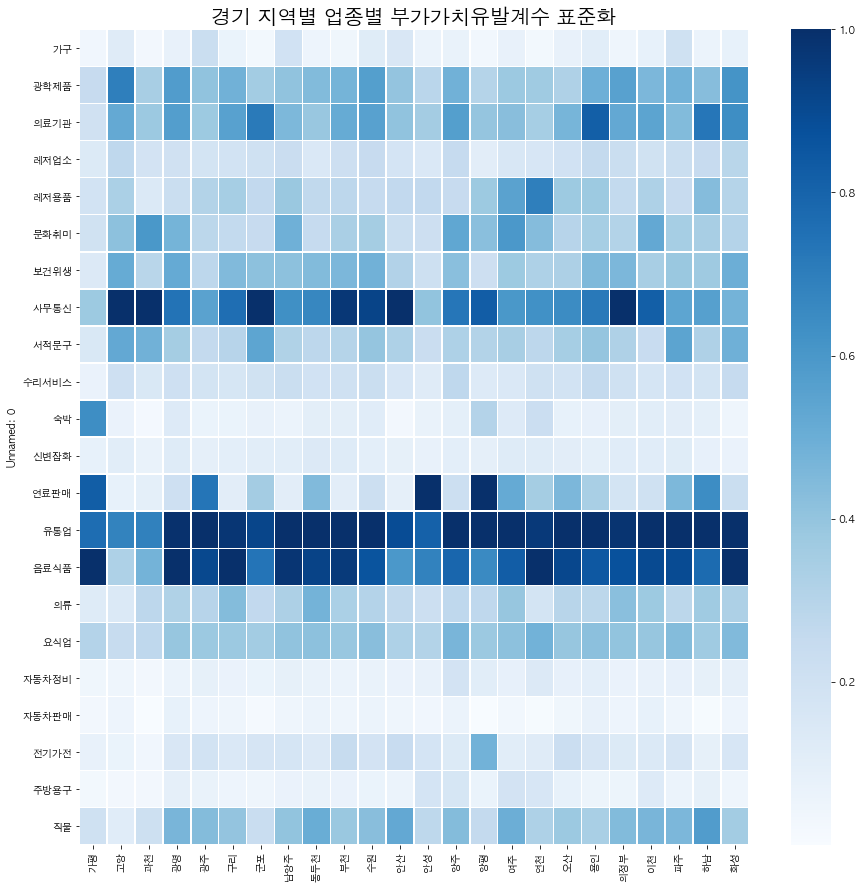

In [147]:
plt.figure(figsize=(15,15))
sns.heatmap(data=vaic_local_stn.transpose(), annot=False, fmt='.2f', \
            linewidths=.5, cmap='Blues')
plt.title('경기 지역별 업종별 부가가치유발계수 표준화', fontsize=20)

In [151]:
#vaic_local_stn.to_csv \
#(DATA_PATH + '경기_지역별_업종별_부가가치유발계수_표준화.csv')